# Equations of State
## Luis Itza Vazquez-Salazar, Silvan Käeser and Markus Meuwly
email: luisitza.vazquezsalazar@unibas.ch

### Index
0. Introduction
1. Ideal Gas
2. Van der Waals equation
3. Other models
4. Bibliography

## 0. Introduction

An equation of state is a mathematical relationship among the thermodynamic parameters of a system that describes how these changes with respect to each other. Thus, if pressure ($P$), volume ($V$), Temperature ($T$) and quantity of substance ($n$), the equation of state takes the general form:

$$ g(n,P,V,T) = 0 $$

There are only three independent thermodynamic parameters in an thermodynamic equilibrium state. An example of an equation of state for which most of you should be familiar is the ideal gas equation:

\begin{equation}
PV-nRT = 0 \tag{1}
\end{equation}

Where $R = 8.315 J\cdot mol^{-1}\cdot K^{-1}$ is the universal gas constant. 

## 1. Ideal Gas

Let's explore some propierties of the ideal gas.


We are going to plot how the pressure changes with respect to the volume and temperature if we keep constant the moles of the system ($n=1$ mol) then equation 1 reduces to:

$$ P=\frac{RT}{V} $$

First, we will plot the isoterms of the system, this means that temperature is keep constant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
R = 0.082 #Universal gas constant in L atm mol**-1 K**-1
T = 298.15 #Temperature in Kelvin
def pressure_isoterm(v):
    p = R*T/v
    return p
v = np.arange(0.1,10.1,0.1) #Volume in Liters
p = pressure_isoterm(v) #Pressure in Atm

Text(0, 0.5, 'Pressure(Atm)')

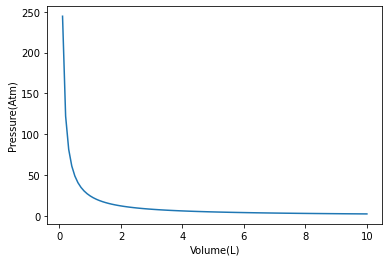

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(v,p, label='Presure at constant temperature')
ax1.set_xlabel(r'Volume(L)')
ax1.set_ylabel('Pressure(Atm)')

Now, we can plot this relationship for different temperatures. 

In [4]:
n=0.010
def pressure(v,t):
    p = n*R*t/v
    return p
v=np.arange(0.1,1,0.01) #Volume in Liters
t=np.arange(50,700,10) #Temperature in Kelvin
pressures = []
for i in t:
    p = pressure(v,i)
    pressures.append(p)

print(pressures)

[array([0.41      , 0.37272727, 0.34166667, 0.31538462, 0.29285714,
       0.27333333, 0.25625   , 0.24117647, 0.22777778, 0.21578947,
       0.205     , 0.1952381 , 0.18636364, 0.17826087, 0.17083333,
       0.164     , 0.15769231, 0.15185185, 0.14642857, 0.14137931,
       0.13666667, 0.13225806, 0.128125  , 0.12424242, 0.12058824,
       0.11714286, 0.11388889, 0.11081081, 0.10789474, 0.10512821,
       0.1025    , 0.1       , 0.09761905, 0.09534884, 0.09318182,
       0.09111111, 0.08913043, 0.08723404, 0.08541667, 0.08367347,
       0.082     , 0.08039216, 0.07884615, 0.07735849, 0.07592593,
       0.07454545, 0.07321429, 0.07192982, 0.07068966, 0.06949153,
       0.06833333, 0.06721311, 0.06612903, 0.06507937, 0.0640625 ,
       0.06307692, 0.06212121, 0.06119403, 0.06029412, 0.05942029,
       0.05857143, 0.05774648, 0.05694444, 0.05616438, 0.05540541,
       0.05466667, 0.05394737, 0.05324675, 0.0525641 , 0.05189873,
       0.05125   , 0.05061728, 0.05      , 0.04939759, 0.0488

Text(0, 0.5, 'Pressure(Atm)')

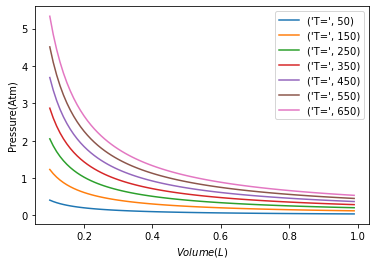

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range(0,len(t),10):
    ax1.plot(v,pressures[i], label=('T=',t[i]))
ax1.legend(loc='best')
ax1.set_xlabel(r'$Volume(L)$')
ax1.set_ylabel('Pressure(Atm)')


Now, we can construct this curves in 3D.

<IPython.core.display.Javascript object>


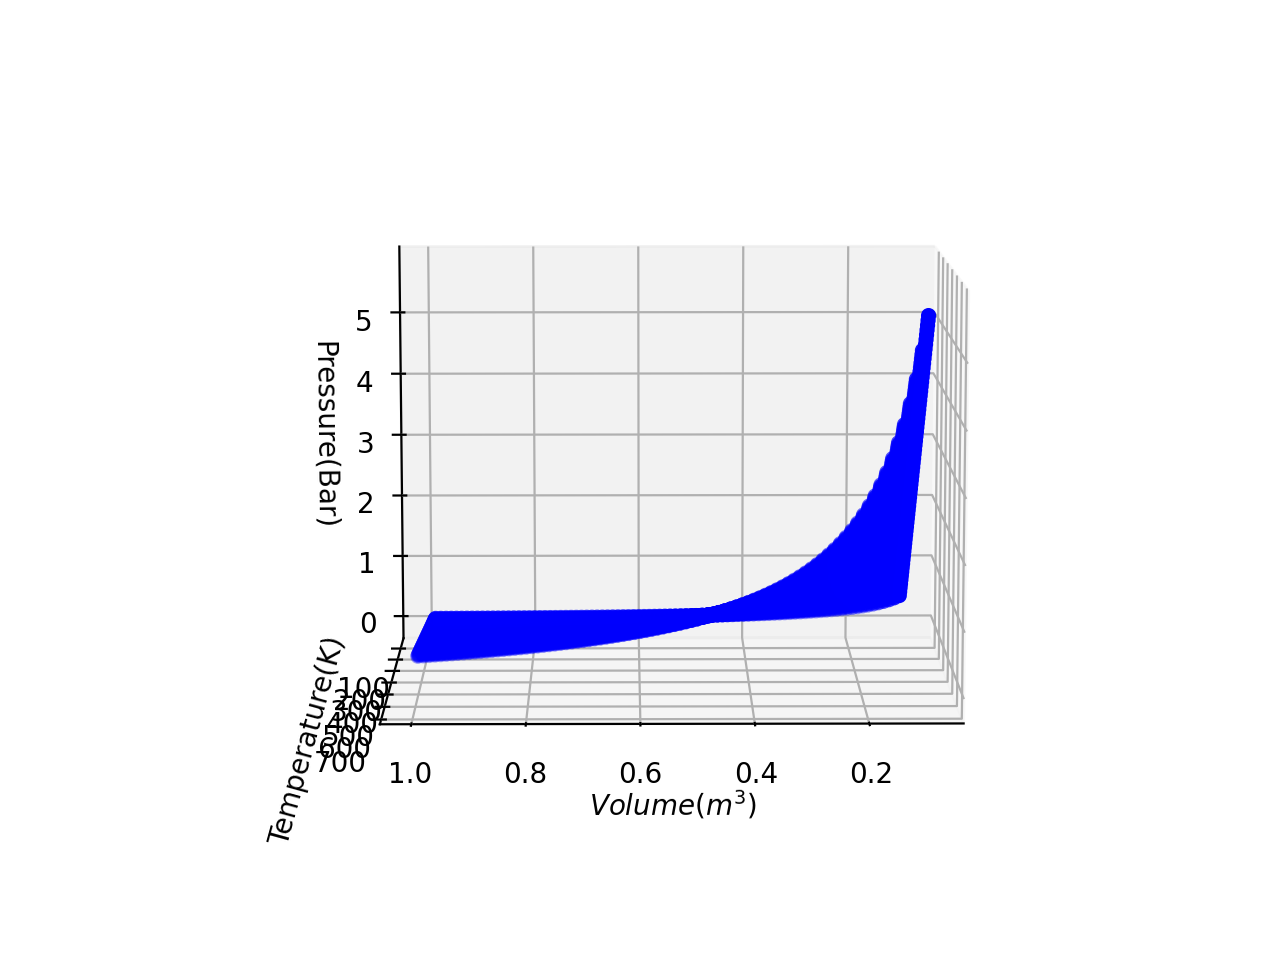

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$Volume(m^3)$')
ax.set_ylabel('Temperature(K)')
ax.set_zlabel('Pressure(Bar)')
for i in range(len(t)):
    ax.scatter(v,t[i],pressures[i],color='blue')


## 2. Van der Waals Equation

The ideal gas equation rarely represent a real system. Over the years many equations have been proposed to adreess the real behaviour of gases. The most known equation is the Van der Waals equation after the Dutch Physicist Johannes Diderik van der Waals. This equation takes into account the interactions between molecules. This dependence is condensed into two different constants '$a$' which represent the strength of the attractive interactions and '$b$' that represents the repulsive interactions between the molecules. 

\begin{equation}
P = \frac{nRT}{V-nb} -a\frac{n^{2}}{V^{2}} \tag{2}
\end{equation}

The values of constants '$a$' and '$b$' can be found in tables. 

| Molecule     |$a(atm L^{6}mol^{-2})$ | $b(10^{-2}L^{3}mol^{-1})$ |
|--------------|-----------------------|---------------------------|
|  Ar          | 1.337                 | 3.20                      |
| $CO_{2}$     | 3.610                 | 4.29                      |
| He           | 0.0341                | 2.38                      |
| Xe           | 4.137                 | 5.16                      |
| Ethane       | 5.5088                | 6.51                      |

We will use $CO_{2}$ to explore some properties of the Van der Waals equation.

In [7]:
def p_vdw(V,T,a,b,n):
    p_rep = n*R*T/(V-n*b)
    p_atr = a*(n**2)/(V**2)
    p_tot = p_rep + p_atr
    return p_tot

In [8]:
a=3.610
b=0.042
n = 0.010
t_co = np.arange(273,323)
pressures_vdw = []
for i in range(len(t_co)):
    p = p_vdw(v,i,a,b,n)
    pressures_vdw.append(p)

print(pressures_vdw)

[array([0.0361    , 0.02983471, 0.02506944, 0.02136095, 0.01841837,
       0.01604444, 0.01410156, 0.01249135, 0.01114198, 0.01      ,
       0.009025  , 0.00818594, 0.00745868, 0.0068242 , 0.00626736,
       0.005776  , 0.00534024, 0.00495199, 0.00460459, 0.00429251,
       0.00401111, 0.0037565 , 0.00352539, 0.00331497, 0.00312284,
       0.00294694, 0.00278549, 0.00263696, 0.0025    , 0.00237344,
       0.00225625, 0.00214753, 0.00204649, 0.00195241, 0.00186467,
       0.00178272, 0.00170605, 0.00163422, 0.00156684, 0.00150354,
       0.001444  , 0.00138793, 0.00133506, 0.00128515, 0.001238  ,
       0.00119339, 0.00115115, 0.00111111, 0.00107313, 0.00103706,
       0.00100278, 0.00097017, 0.00093913, 0.00090955, 0.00088135,
       0.00085444, 0.00082874, 0.00080419, 0.00078071, 0.00075824,
       0.00073673, 0.00071613, 0.00069637, 0.00067743, 0.00065924,
       0.00064178, 0.000625  , 0.00060887, 0.00059336, 0.00057843,
       0.00056406, 0.00055022, 0.00053688, 0.00052402, 0.0005

<IPython.core.display.Javascript object>


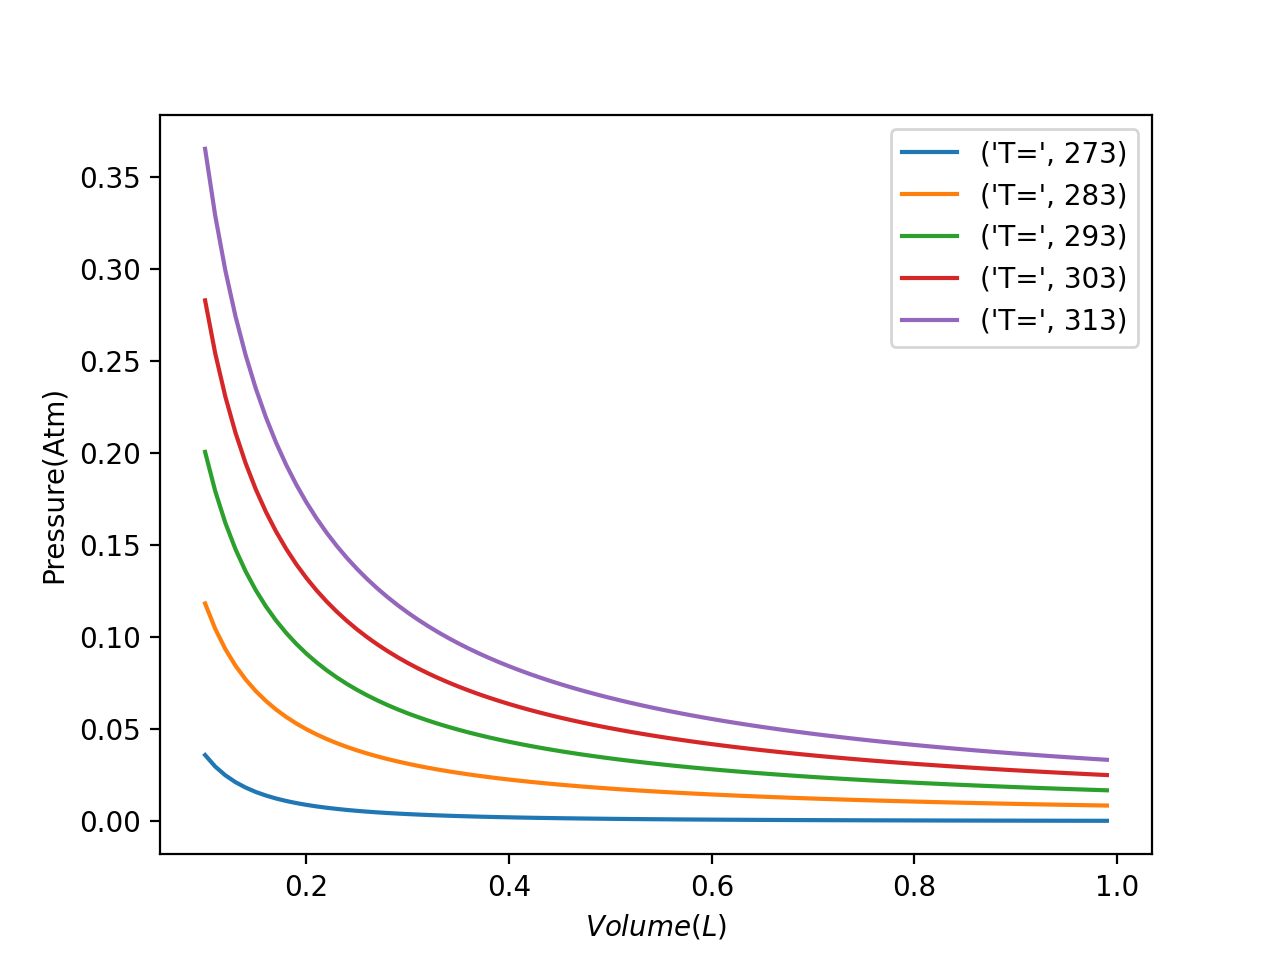

Text(0, 0.5, 'Pressure(Atm)')

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range(0,len(t_co),10):
    ax1.plot(v,pressures_vdw[i], label=('T=', t_co[i]))
ax1.legend(loc='best')
ax1.set_xlabel(r'$Volume(L)$')
ax1.set_ylabel('Pressure(Atm)')


<IPython.core.display.Javascript object>


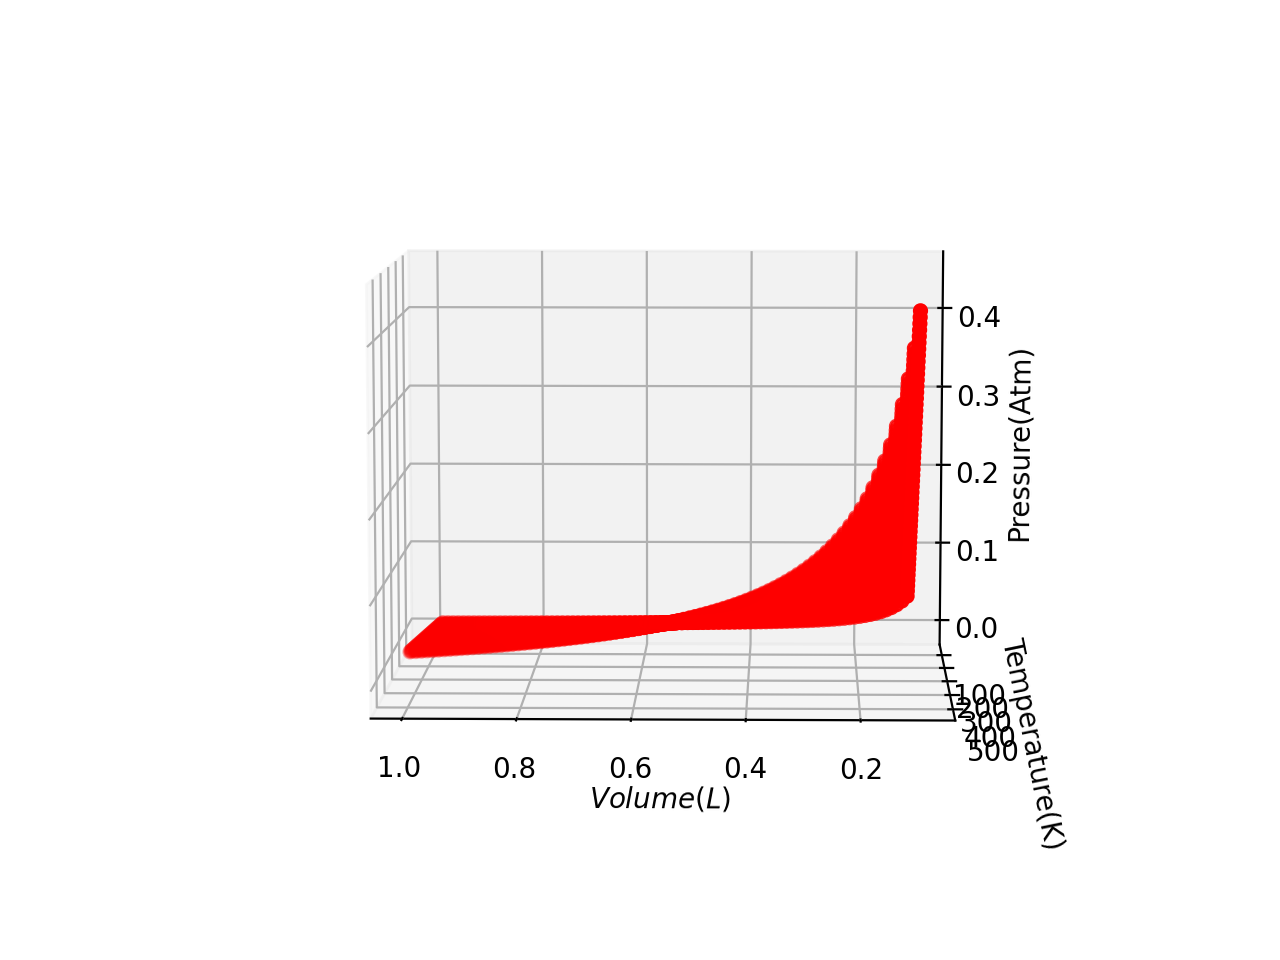

In [10]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$Volume(L)$')
ax.set_ylabel('Temperature(K)')
ax.set_zlabel('Pressure(Atm)')
for i in range(len(pressures_vdw)):
    ax.scatter(v,t[i],pressures_vdw[i],color='red')
    #ax.scatter(v,t[i],pressures[i],color='blue')


For convinience, we will introduce a new variable called 'molar volume' as:

\begin{equation}
V_{m}=V/n \tag{3}
\end{equation}

Then, it is possible to write the Van der Waals equation as:

\begin{equation}
P=\frac{RT}{V_{m}-b}-\frac{a}{V_{m}^{2}}
\end{equation}

When you work with the Van der Waals equation. One of the complications is that you can not obtain the molar volume directly from the equation. However, Van der Waals equation can be rearrange to obtain the molar volume from a cubic equation. The rearranged Van der Waals equation is:

\begin{equation}
V_{m}^{3} - \left(b + \frac{RT}{p} \right) V_{m}^{2} + \left(\frac{a}{p}\right) V_{m} + \frac{ab}{p} = 0
\end{equation}

We will obtain the molar volume of $CO_{2}$ at 500 K and 100 atm. 

In [12]:
def vdw_cubic(a,b,T,p):
    second_order = b + R*T/p
    first_order = a/p
    zero_order = a*b/p
    coefficients = [1, -second_order, first_order, zero_order]
    return coefficients
a = 3.592
b = 4.267*(10**-2)
T = 500
p = 100

Vm = np.roots(vdw_cubic(a,b,T,p))
print('The roots are:', Vm)

The roots are: [ 0.3295671   0.15341682 -0.03031392]


**Exercise**
The Redlich-Kwong equation is a cubic equation with the form:
\begin{equation}
P = \frac{RT}{V_{m}-b} - \frac{a}{\sqrt{T}}\frac{1}{V_{m}(V_{m}+b)}
\end{equation}
From this equation obtain the values of the molar volume of ethane at 300K and 200 atm. Write a function to solve the  The values of the constants are: $a=97.539L^{6}\cdot atm \cdot mol^{-1} \cdot K^{1/2}$ and $b=0.045153L^{3}\cdot mol^{-1}$. Compare the value from the Van der Waals equation. The experimental value is $0.071 L^{3}\cdot mol^{-1}$.

## 3. Other equations

Theres is a whole jungle of other equations of state. Each of them is derived from different assumptions. Few examples are:

* Berthelot equation
\begin{equation}
P = \frac{nRT}{V-nb}-\frac{n^{2}a}{TV^{2}}
\end{equation}
* Dieterici equation
\begin{equation}
P=\frac{nRT}{V-nb}exp\left(-\frac{na}{RTV}\right)
\end{equation}
* Redlich-Kwong equation
\begin{equation}
P = \frac{nRT}{V-nb} - \frac{n^{2}a}{\sqrt{T}}\frac{1}{V(V+nb)}
\end{equation}
* Claussius equation for gases
\begin{equation}
P = \frac{RT}{V_{m}-b} - \frac{a}{T(V_{m}-c)^{2}}
\end{equation}
* Wohl equation
\begin{equation}
P = \frac{RT}{V_{m}-b} - \frac{a}{TV_{m}(V_{m}-b)} - \frac{c}{T^{2}V_{m}^{3}}
\end{equation}

The values of the empirical constants changes from each formulation. Then it is convinient to formulate these properties on terms of **critical propierties**.These propierties are the values or pressure, temperature or volume at which a substance change its behaviour (i.e. changes from gas to liquid). Then, the values of the constant a and b for the different equations are:

* For the Van der Waals equation
\begin{equation}
a = \frac{27 R^{2}T_{c}^{2}}{64P_{c}} \quad b=\frac{RT_{c}}{8P_{c}}
\end{equation}
* For the Berthelot equation
\begin{equation}
a = \frac{27R^{2}T_{c}^{3}}{64P_{c}} \quad b=\frac{RT_{c}}{8P_{c}}
\end{equation}
* For the Dieterici equation
\begin{equation}
a = \frac{4R^{2}T_{c}^{2}}{P_{c}e^{2}} \quad b=\frac{RT_{c}}{P_{c}e^{2}}
\end{equation}
* For the Redlich-Kwong equation
\begin{equation}
a = 0.42748\frac{R^{2}T_{c}^{2.5}}{P_{c}} \quad b=0.0866\frac{RT_{c}}{P_{c}}
\end{equation}
* For the Claussius equation
\begin{equation}
a = \frac{27R^{2}T_{c}^{3}}{64P_{c}} \quad b=V_{m,c}-\frac{RT_{c}}{4P_{c}} \quad c= \frac{3RT_{c}}{8P_{c}}-V_{m,c}
\end{equation}
* For the Wohl equation
\begin{equation}
a = 6P_{c}T_{c}V_{c}^{2} \quad b = \frac{V_{c}}{4} \quad c=4P_{c}T_{c}^{2}V_{c}^{3} 
\end{equation}
Note that $V_{c}=\frac{RT^{c}}{3.7P_{c}}$


Value for the critical constants can be found on Handbooks of Chemistry and Physics. An example of few of these values is:

| Molecule     |$T_{c}(K)$ | $P_{c}(atm)$ | $V_{m,c}(cm^{3}mol^{-1}$ |
|--------------|-----------|--------------|--------------------------|
|  Ar          | 150.9     | 48.3         | 74.6     |
| $CO_{2}$     | 304.2     | 72.88        | 94.0     |
| He           | 5.2       | 2.26         | 57.8     |
| Xe           | 289.75    | 58.0         | 118.8    |
| Ethane       | 305.4     | 48.2         | 148      |

To manage the large differences of equations, it is convinient to write a Class which englove this equations. 

In [30]:
class Equations:
    def __init__(self):
            self.R = 0.082
    def ideal(self,n,T,v):
        p = n*self.R*T/v
        return p
    def vdw(self,n,T,v,a,b):
        p = n*self.R*T/(v-n*b)-(a*n**2)/v**2
        return p
    def berthelot(self,n,T,v,a,b):
        p = n*self.R*T/(v-n*b)-(a*n**2)/(T*v**2)
        return p
    def dieteric(self,n,T,v,a,b):
        p = (n*self.R*T/(v-n*b))*np.exp(-n*a/(self.R*T*v))
        return p
    def Red_Kwo(self,n,T,v,a,b):
        p = n*self.R*T/(v-n*b) -(a*n**2)/(np.sqrt(T)*v*(v+n*b))
        return p

In [31]:
class Constants:
    def __init__(self):
        self.R = 0.082
    def ab_vdw(self,tc,pc):
        a = (27*(self.R**2)*(tc**2))/(64*pc)
        b = (self.R*tc)/(8*pc)
        constants_vdw = [a,b]
        return constants_vdw
    def ab_bert(self,tc,pc):
        a = (27*(self.R**2)*(tc**3))/(64*pc)
        b = (self.R*tc)/(8*pc)
        constants_bert = [a,b]
        return constants_bert
    def ab_diet(self,tc,pc):
        a = (4*(self.R**2)*(tc**2))/(np.exp(2)*pc)
        b = (self.R*tc)/(np.exp(2)*pc)
        constants_diet = [a,b]
        return constants_diet
    def ab_Red_Kwo(self,tc,pc):
        a = 0.42748*((self.R**2)*(tc**2.5))/pc
        b = 0.0866*(self.R*tc)/pc
        constants_Red_Kwo = [a,b]
        return constants_Red_Kwo

We will study the different behaviours for these equations for the case of Argon. First, we determine the constants of the formulations using the class define for the constants.

In [32]:
tc = 150.9
pc = 48.3

constants = Constants()

constants_VdW = constants.ab_vdw(tc,pc)
constants_bert = constants.ab_bert(tc,pc)
constants_diet = constants.ab_diet(tc,pc)
constants_Red_Kwo = constants.ab_Red_Kwo(tc,pc)

In [35]:
n=0.010
T = 50.15
v=np.arange(0.1,10,0.01)
gases = Equations()
p_ideal = gases.ideal(n,T,v)
p_vdw = gases.vdw(n,T,v,constants_VdW[0],constants_VdW[1])
p_berthelot = gases.berthelot(n,T,v,constants_bert[0],constants_bert[1])
p_dieteric = gases.dieteric(n,T,v,constants_diet[0],constants_diet[1])
p_Red_Kwo = gases.Red_Kwo(n,T,v,constants_Red_Kwo[0],constants_Red_Kwo[1])


<IPython.core.display.Javascript object>


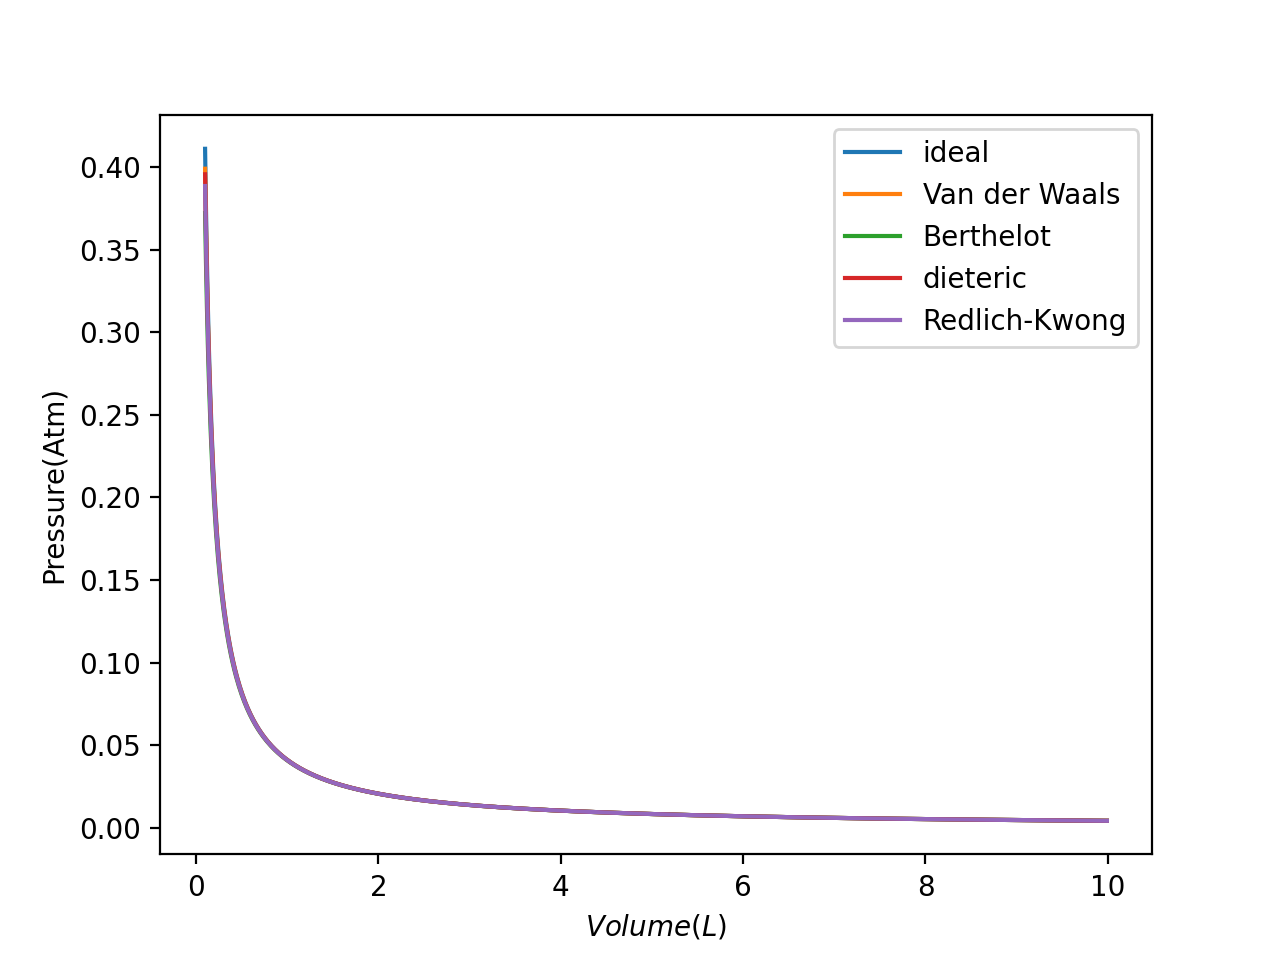

Text(0, 0.5, 'Pressure(Atm)')

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(v,p_ideal, label='ideal')
ax1.plot(v,p_vdw, label='Van der Waals')
ax1.plot(v,p_berthelot, label='Berthelot')
ax1.plot(v,p_dieteric, label='dieteric')
ax1.plot(v,p_Red_Kwo, label='Redlich-Kwong')
ax1.legend(loc='best')
ax1.set_xlabel(r'$Volume(L)$')
ax1.set_ylabel('Pressure(Atm)')

**Exersise**
Construct a class for the Claussius and for the Wohl equation and another for the constants for the equation. Construct the isoterms for these two equations for $CO_{2}$ on a range from 10 K to 300 K. 

## 4. Bibliography

* Atkins P., de Paula J. and Keeler J. (2018). Physical Chemistry. Oxford University Press
* Klotz I. and Rosenberg R. (2008). Chemical Thermodynamics: Basic Concepts and Methods. Jonh Wiley and Sons.
* Levine I.N.(2009). Physical Chemistry. McGraw Hill.
* Engel T. and Reid P. (2013). Thermodynamics, Statistical Thermodynamics and Kinetics. Pearson.
* McQuarrie D. and Simon J. (1999). Molecular Thermodynamics. University Science Books.
* Valderrama, J. O. (2003). The state of the cubic equations of state. Industrial & engineering chemistry research, 42(8), 1603-1618.
* Ramdharee, S., Muzenda, E., & Belaid, M. (2013, September). A review of the equations of state and their applicability in phase equilibrium modeling. In International Conference on Chemical and Environmental Engineering, Johannesburg (ICCEE).
* Shah, K. K., & Thodos, G. (1965). A comparison of equations of state. Industrial & Engineering Chemistry, 57(3), 30-37.
